## Titanic Survival Prediction (Kaggle)

This notebook explores the Titanic dataset to understand basic features and build a survival prediction model.  
The initial setup follows Alexis Cook’s Kaggle tutorial and is later extended with independent analysis.

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
# Random Forest Implementation From Tutorial

# from sklearn.ensemble import RandomForestClassifier

# y = train_data["Survived"]

# features = ["Pclass", "Sex", "SibSp", "Parch"]
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")

print("0.77 Score")

0.77 Score


## Independent Analysis Starts Here

From this point onward, the analysis is independent of the tutorial.  
Missing values were handled by dropping `Cabin`, filling `Embarked` with the most frequent value, and imputing `Age` using simple family-based heuristics.

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
len(train_data)

891

In [9]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# Since Embarked had 2 missing values so filling it with the highest category
# train_data['Embarked'].fillna('S', inplace=True)

In [11]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: str

In [12]:
# dropping Cabin because of so many missing values
train_data.drop('Cabin', axis=1, inplace=True)

In [13]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [14]:
pd.set_option('display.max_rows', None)

In [15]:
# Select rows where Age is null
missing_age = train_data[train_data['Age'].isnull()][['SibSp', 'Parch', 'Pclass']]

# Display the data
missing_age

,SibSp,Parch,Pclass
5,0,0,3
17,0,0,2
19,0,0,3
26,0,0,3
28,0,0,3
29,0,0,3
31,1,0,1
32,0,0,3
36,0,0,3
42,0,0,3


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

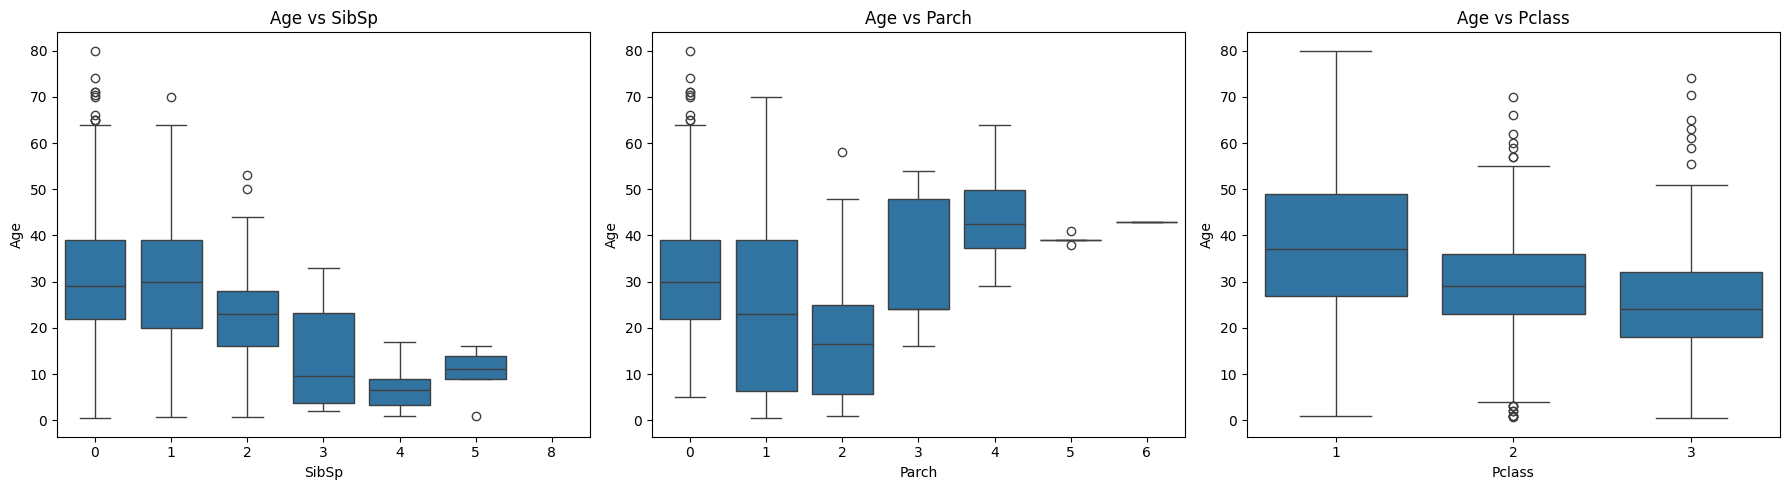

In [17]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Age vs SibSp
sns.boxplot(x='SibSp', y='Age', data=train_data, ax=axes[0])
axes[0].set_title('Age vs SibSp')

# Age vs Parch
sns.boxplot(x='Parch', y='Age', data=train_data, ax=axes[1])
axes[1].set_title('Age vs Parch')

# Age vs Pclass
sns.boxplot(x='Pclass', y='Age', data=train_data, ax=axes[2])
axes[2].set_title('Age vs Pclass')

plt.tight_layout()  # Adjust spacing
plt.show()

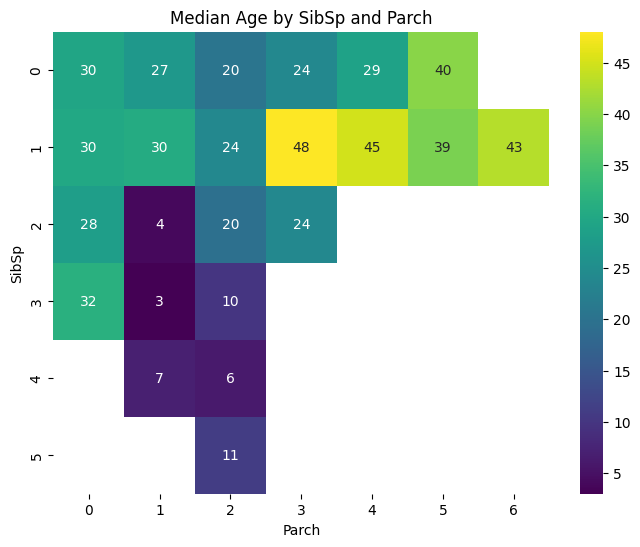

In [18]:
pivot = train_data.pivot_table(
    values='Age',
    index='SibSp',
    columns='Parch',
    aggfunc='median'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='viridis')
plt.xlabel('Parch')
plt.ylabel('SibSp')
plt.title('Median Age by SibSp and Parch')
plt.show()

In [ ]:
age_null = train_data[train_data['Age'].isnull()]
plt.figure(figsize=(6, 5))
plt.scatter(age_null['Parch'], age_null['SibSp'], alpha=0.7)

plt.xlabel('Parch (Parents / Children)')
plt.ylabel('SibSp (Siblings / Spouse)')
plt.title('SibSp vs Parch for passengers with missing Age')

plt.show()

In [ ]:
age_null[['SibSp', 'Parch']].value_counts()

In [ ]:
exact_median = train_data.groupby(['SibSp', 'Parch'])['Age'].median()
exact_median

### Filling Missing Age Values (Simple Heuristic)

Age was imputed using simple, rule-based assumptions:
- **Case 1:** Passengers with higher `Parch` and `SibSp` were treated as children.
- **Case 2:** Passengers with higher `Parch` but low `SibSp` were treated as adults.
- **Case 3:** All remaining missing values were filled using the global median age.
  

In [ ]:
large_family_median = train_data[
    (train_data['SibSp'] + train_data['Parch']) >= 4
]['Age'].median()
large_family_median

In [ ]:
parent_heavy_median = train_data[
    (train_data['Parch'] >= 2) & (train_data['SibSp'] < 3)
]['Age'].median()
parent_heavy_median

In [ ]:
global_median = train_data['Age'].median()
global_median

In [ ]:
def impute_age(row):
    if pd.notnull(row['Age']):
        return row['Age']
    
    key = (row['SibSp'], row['Parch'])
    
    # Level 1: exact group
    if key in exact_median.index and pd.notnull(exact_median.loc[key]):
        return exact_median.loc[key]
    
    # Level 2: large family fallback
    if (row['SibSp'] + row['Parch']) >= 4:
        return large_family_median
    
    # Level 3: parent-heavy fallback
    if row['Parch'] >= 2 and row['SibSp'] < 3:
        return parent_heavy_median
    
    # Level 4: global fallback
    return global_median


In [ ]:
train_data['Age'] = train_data.apply(impute_age, axis=1)
test_data['Age'] = test_data.apply(impute_age, axis=1)

In [ ]:
train_data['Age'].isnull().sum(), test_data['Age'].isnull().sum()

In [ ]:
train_data['Age'].describe()

## Evaluating Scores

After imputing Age, model performance was evaluated using K-Fold cross-validation.  
Training and validation scores were compared to ensure the model was not overfitting.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = []
train_scores = []
cms = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=1
    )
    
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    train_pred = model.predict(X_train)
    
    score = accuracy_score(y_val, val_pred)
    train_score = accuracy_score(y_train, train_pred)
    train_scores.append(train_score)
    scores.append(score)

    cm = confusion_matrix(y_val, val_pred)
    cms.append(cm)


In [ ]:
print("Fold scores:", scores)
print("Mean CV accuracy:", sum(scores) / len(scores))

variance = np.var(scores)
std_dev = np.std(scores)

print("Variance:", variance)
print("Standard Deviation:", std_dev)

print('Train Data ==================')

print("Fold scores:", train_scores)
print("Mean CV accuracy:", sum(train_scores) / len(train_scores))

variance = np.var(train_scores)
std_dev = np.std(train_scores)

print("Variance:", variance)
print("Standard Deviation:", std_dev)

print("Difference:", (sum(train_scores) / len(train_scores) - sum(scores) / len(scores)))

### Testing a Different Model (XGBoost)

XGBoost was tested as an alternative model, but performance was similar to the Random Forest baseline, so no further tuning was pursued.

In [ ]:
# from xgboost import XGBClassifier

In [ ]:
# scores = []

# for train_index, val_index in skf.split(X, y):
#     X_train, X_val = X.iloc[train_index], X.iloc[val_index]
#     y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
#     model = XGBClassifier(
#         n_estimators=200,
#         max_depth=4,
#         learning_rate=0.05,
#         subsample=0.8,
#         colsample_bytree=0.8,
#         random_state=42,
#         eval_metric="logloss",
#         use_label_encoder=False
#     )
    
#     model.fit(X_train, y_train)
#     val_pred = model.predict(X_val)
    
#     score = accuracy_score(y_val, val_pred)
#     scores.append(score)


In [ ]:
# print("Fold scores:", scores)
# print("Mean CV accuracy:", sum(scores) / len(scores))

## In-Depth Analysis

At this stage, deeper analysis was performed to understand model behaviour and identify remaining limitations.

In [ ]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")]

In [ ]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")].groupby("Pclass").size()

In [ ]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male")].groupby("Embarked").size()

In [ ]:
train_data.groupby("Embarked").size()

In [ ]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Sex")
    .size()
    / train_data.groupby("Sex").size()
) * 100

survived_pct

In [ ]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Pclass")
    .size()
    / train_data.groupby("Pclass").size()
) * 100

survived_pct

In [ ]:
survived_pct = (
    train_data[train_data["Survived"] == 1]
    .groupby("Embarked")
    .size()
    / train_data.groupby("Embarked").size()
) * 100

survived_pct

In [ ]:
train_data.groupby(["Pclass", "Embarked"]).agg(
    total=("Survived", "count"),
    survived=("Survived", "sum"),
    survival_rate=("Survived", "mean")
)


In [ ]:
age_bins = pd.cut(
    train_data["Age"],
    bins=range(0, 85, 5),   # 0–5, 5–10, ..., 80–85
    right=False
)


In [ ]:
age_table = (
    train_data
    .groupby(age_bins)
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_table["survival_rate"] *= 100
age_table


In [ ]:
cm_df = pd.DataFrame(
    cms[0],
    index=["Actual 0", "Actual 1"],
    columns=["Pred 0", "Pred 1"]
)

cm_df

In [ ]:
TN, FP, FN, TP = cms[0].ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)

precision, recall

In [ ]:
sex_summary = (
    train_data
    .groupby("Sex")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

sex_summary["survival_pct"] *= 100
sex_summary


In [ ]:
pclass_summary = (
    train_data
    .groupby("Pclass")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

pclass_summary["survival_pct"] *= 100
pclass_summary

In [ ]:
embarked_summary = (
    train_data
    .dropna(subset=["Embarked"])
    .groupby("Embarked")
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        not_survived=("Survived", lambda x: (x == 0).sum()),
        survival_pct=("Survived", "mean")
    )
)

embarked_summary["survival_pct"] *= 100
embarked_summary


In [ ]:
age_class_table = (
    train_data
    .groupby([age_bins, "Pclass"])
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_class_table["survival_rate"] *= 100
age_class_table


In [ ]:
age_sex_class_table = (
    train_data
    .groupby([age_bins, "Sex", "Pclass"])
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

age_sex_class_table["survival_rate"] *= 100
age_sex_class_table

In [ ]:
male_pclass3_age_table = (
    train_data[
        (train_data["Sex"] == "male") &
        (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")
    ]
    .groupby(age_bins)
    .agg(
        total=("Survived", "count"),
        survived=("Survived", "sum"),
        survival_rate=("Survived", "mean")
    )
)

male_pclass3_age_table["survival_rate"] *= 100
male_pclass3_age_table


In [ ]:
train_data[(train_data["Survived"] == 1) & (train_data["Sex"] == "male") & (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")]

In [ ]:
train_data[(train_data["Survived"] == 1) & (train_data["Pclass"] == 3) &
        (train_data["Embarked"] == "Q")]

In [ ]:
train_data["Ticket_num"] = pd.to_numeric(
    train_data["Ticket"],
    errors="coerce"
)

filtered = train_data[
    (train_data["Survived"] == 1) &
    (train_data["Ticket_num"].between(300000, 400000))
]


In [ ]:
filtered

In [ ]:
survival_percentage = filtered["Survived"].mean() * 100
survival_percentage

In [ ]:
len(filtered)

In [ ]:
records = []

for train_index, val_index in skf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=1
    )

    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)

    for idx, actual, pred in zip(val_index, y_val, val_pred):
        records.append({
            "index": idx,
            "actual": actual,
            "predicted": pred
        })

    break


In [ ]:
# Since we are focusing on False negative
endResults = pd.DataFrame(records)
FNs = endResults.loc[
    (endResults['actual'] == 1) & (endResults['predicted'] == 0),
    'index'
]
FNs

In [ ]:
fold_data_FNs = train_data.loc[FNs]
fold_data_FNs

In [ ]:
fold_data_FNs.groupby('Pclass').size()

In [ ]:
fold_data_FNs.groupby('Embarked').size()

In [ ]:
# Since we are focusing on False negative
endResults = pd.DataFrame(records)
TNs = endResults.loc[
    (endResults['actual'] == 0) & (endResults['predicted'] == 0),
    'index'
]

In [ ]:
fold_data_TNs = train_data.loc[TNs]
fold_data_TNs

In [ ]:
pClass = fold_data_TNs[fold_data_TNs['Sex'] == 'male'].groupby('Pclass').size()

print("True Negatives")
print(pClass)

print("\n")

pClass = fold_data_FNs[fold_data_FNs['Sex'] == 'male'].groupby('Pclass').size()

print("False Negatives")
print(pClass)


In [ ]:
tn_male_p1 = fold_data_TNs[
    (fold_data_TNs['Sex'] == 'male') &
    (fold_data_TNs['Pclass'] == 1)
].copy()

fn_male_p1 = fold_data_FNs[
    (fold_data_FNs['Sex'] == 'male') &
    (fold_data_FNs['Pclass'] == 1)
].copy()

tn_male_p1['case'] = 'TN'
fn_male_p1['case'] = 'FN'

combined = pd.concat([tn_male_p1, fn_male_p1], axis=0)
combined


In [ ]:
age_bins = np.arange(0, tn_male_p1['Age'].max() + 5, 5)
tn_age_embarked = (
    tn_male_p1
    .groupby([
        pd.cut(tn_male_p1['Age'], bins=age_bins),
        tn_male_p1['Embarked']
    ])
    .size()
)

print("True Negatives (Age x Embarked)")
print(tn_age_embarked)

print("---------------------------------")

age_bins = np.arange(0, fn_male_p1['Age'].max() + 5, 5)
fn_age_embarked = (
    fn_male_p1
    .groupby([
        pd.cut(fn_male_p1['Age'], bins=age_bins),
        fn_male_p1['Embarked']
    ])
    .size()
)

print("\nFalse Negatives (Age x Embarked)")
print(fn_age_embarked)

## Updating the Decision Threshold

At this stage, the decision threshold was tuned to adjust model behaviour. 
A threshold of **0.4** was selected as it increased recall while maintaining stable and acceptable precision across folds.

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
thresholds = [0.3, 0.4, 0.5]
records = {}

for threshold in thresholds:
    records[threshold] = {
        "recall": [],
        "precision": [],
        "confusion_matrices": []
    }
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
        
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=5,
            random_state=1
        )
        
        model.fit(X_train, y_train)
    
        # Get probability of Survived (class = 1)
        val_probs = model.predict_proba(X_val)[:, 1]
    
        # Apply threshold
        val_pred = (val_probs >= threshold).astype(int)

        # Confusion matrix
        cm = confusion_matrix(y_val, val_pred)
        records[threshold]["confusion_matrices"].append(cm)
    
        # Extract values
        TN, FP, FN, TP = cm.ravel()

        # Metrics
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0

        records[threshold]["recall"].append(recall)
        records[threshold]["precision"].append(precision)



In [ ]:
summary = []

for t, data in records.items():
    summary.append({
        "threshold": t,
        "recall_mean": np.mean(data["recall"]),
        "recall_std": np.std(data["recall"]),
        "precision_mean": np.mean(data["precision"]),
        "precision_std": np.std(data["precision"])
    })

summary_df = pd.DataFrame(summary).set_index("threshold")
summary_df